In [51]:
import meep as mp
import meep.adjoint as mpa
import numpy as np
import nlopt
from autograd import numpy as npa
from autograd import tensor_jacobian_product, grad
from matplotlib import pyplot as plt
import os
import math

mp.verbosity(1)

SiO2 = mp.Medium(index=1.5*1.5)
resolution = 100


def simulate_lens(diameter_values):
    # Define your material (SiO2) here if not defined already
    # SiO2 = ...

    for diameter_val in diameter_values:
        # Update diameter in the simulation parameters
        diameter = diameter_val

        # Constants
        PI = np.pi

        # Constants
        a = 1.0
        scale_down = 1

        # Parameters of the Plano convex lens
        d = (diameter / (a * scale_down)) / 2.0
        focal = d * math.sqrt(21.0) / 2.0
        r_cur = focal / (2 * a * scale_down)

        # Geometry properties
        Lpml = 0.25 * d
        Lx = diameter / (a * scale_down) + Lpml * 2
        Ly = Lpml + 0.25 * d + focal + r_cur - math.sqrt(r_cur * r_cur - d * d) + 0.5 * d + Lpml 

        pml_layers = [mp.PML(thickness=Lpml,)]

        # Position information
        src_ypos =  - Ly / 2 + Lpml + 0.25 * d
        transmission_ypos = Lpml + 1.0
        lens_ypos = - Ly / 2 + Lpml + 0.5 * d + math.sqrt(r_cur * r_cur - d * d)
        x_center = 0
        y_center = lens_ypos + math.sqrt(r_cur * r_cur - d * d)

        # Source settings
        width = 0.1

        fcen_red = 1/(0.65)
        fwidth_red = fcen_red * width

        fcen_green = 1/(0.55)
        fwidth_green = fcen_green * width

        fcen_blue = 1/(0.45)
        fwidth_blue = fcen_blue * width

        src_0 = mp.GaussianSource(frequency=fcen_red, fwidth=fwidth_red, is_integrated=True)
        src_1 = mp.GaussianSource(frequency=fcen_green, fwidth=fwidth_green, is_integrated=True)
        src_2 = mp.GaussianSource(frequency=fcen_blue, fwidth=fwidth_blue, is_integrated=True)

        source_center = [0, src_ypos] # Source position
        source_size = mp.Vector3(Lx)

        source = [mp.Source(src_0, component=mp.Ez, size=source_size, center=source_center,)]

        cell = mp.Vector3(math.ceil(Lx*10)/10, math.ceil(Ly*10)/10)

        geometry = []
        for pos_x in np.arange(-10, 10, 0.01):
            for pos_y in np.arange(-10, 10, 0.01):
                if pos_y <= (lens_ypos):
                    if ((pos_x - x_center) ** 2 + (pos_y - y_center) ** 2 <= (r_cur ** 2)):
                        geometry.append(mp.Block(center=mp.Vector3(pos_x, pos_y), size=mp.Vector3(0.5/resolution, 0.5/resolution), material=SiO2))

        sim = mp.Simulation(
            cell_size=cell, 
            boundary_layers=pml_layers,
            geometry=geometry,
            sources=source,
            resolution=resolution,
        )
        sim.plot2D()
        
        print(Lx, Ly)


     block, center = (-0.24,-0.2,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.24,-0.19,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.23,-0.21,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.23,-0.2,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.23,-0.19,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.22,-0.23,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,

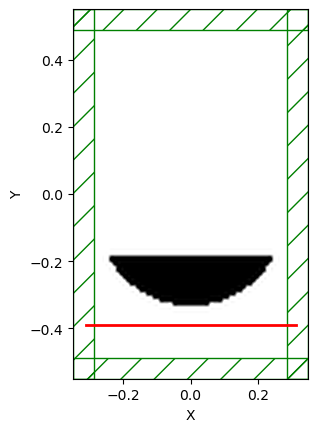

In [52]:
simulate_lens([0.5])

     block, center = (-0.49,-0.39,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.49,-0.38,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.48,-0.41,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.48,-0.4,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.48,-0.39,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.48,-0.38,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1

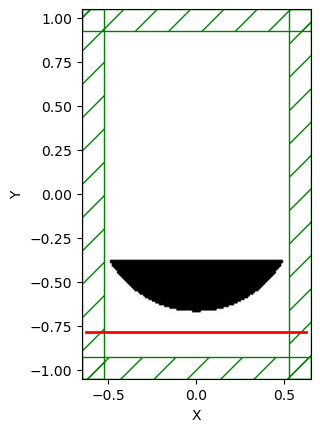

In [53]:
simulate_lens([1.0])

     block, center = (-0.74,-0.58,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.74,-0.57,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.6,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.59,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.58,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.57,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1

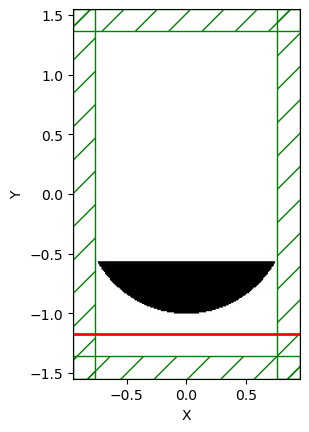

In [54]:
simulate_lens([1.5])

     block, center = (-0.99,-0.77,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.99,-0.76,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.98,-0.78,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.98,-0.77,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.98,-0.76,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.97,-0.8,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1

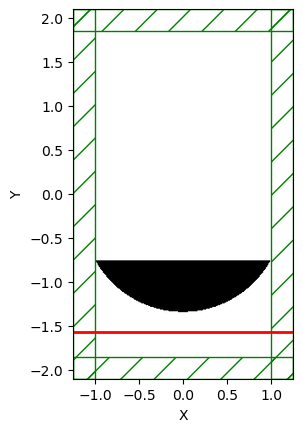

In [55]:
simulate_lens([2.0])

     block, center = (-1.24,-0.96,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.24,-0.95,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.23,-0.97,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.23,-0.96,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.23,-0.95,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.22,-0.99,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,

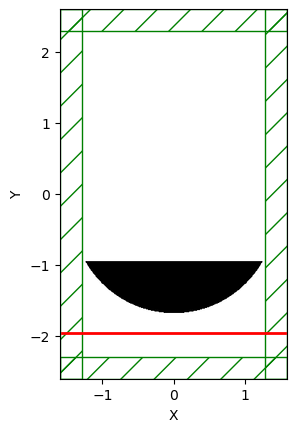

In [56]:
simulate_lens([2.5])

     block, center = (-1.49,-1.15,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.49,-1.14,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.48,-1.16,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.48,-1.15,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.48,-1.14,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-1.47,-1.18,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,

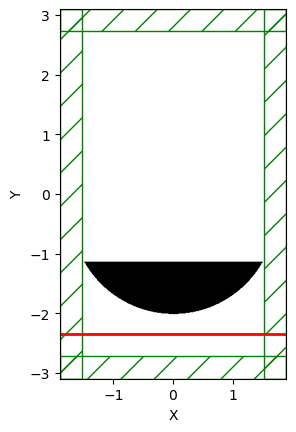

In [57]:
simulate_lens([3])

     block, center = (-2.49,-1.9,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-2.49,-1.89,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-2.48,-1.92,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-2.48,-1.91,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-2.48,-1.9,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-2.48,-1.89,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,

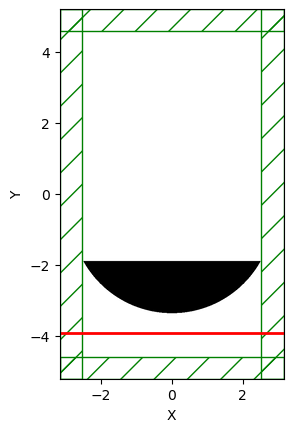

In [58]:
simulate_lens([5])

In [1]:
import meep as mp
import meep.adjoint as mpa
import numpy as np
import nlopt
from autograd import numpy as npa
from autograd import tensor_jacobian_product, grad
from matplotlib import pyplot as plt
import os
import math

     block, center = (-0.74,-0.58,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.74,-0.57,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.6,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.59,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.58,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.57,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1

<Axes: xlabel='X', ylabel='Y'>

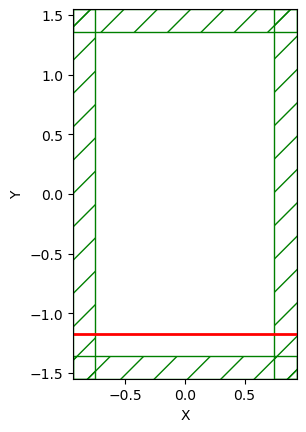

In [12]:
SiO2 = mp.Medium(index=1.5*1.5)

# Update diameter in the simulation parameters
diameter = 1.5

# Constants
PI = np.pi

# Constants
a = 1.0
scale_down = 1

# Parameters of the Plano convex lens
d = (diameter / (a * scale_down)) / 2.0
focal = d * math.sqrt(21.0) / 2.0
r_cur = focal / (2 * a * scale_down)

# Geometry properties
Lpml = 0.25 * d
Lx = diameter / (a * scale_down) + Lpml * 2
Ly = Lpml + 0.25 * d + focal + r_cur - math.sqrt(r_cur * r_cur - d * d) + 0.5 * d + Lpml 
resolution = 100

pml_layers = [mp.PML(thickness=Lpml,)]

# Position information
src_ypos = -Ly / 2 + Lpml + 0.25 * d
transmission_ypos = Lpml + 1.0
lens_ypos = -Ly / 2 + Lpml + 0.5 * d + math.sqrt(r_cur * r_cur - d * d)
x_center = 0
y_center = lens_ypos + math.sqrt(r_cur * r_cur - d * d)

# Source settings
width = 0.1

fcen_red = 1/(0.65)
fwidth_red = fcen_red * width

fcen_green = 1/(0.55)
fwidth_green = fcen_green * width

fcen_blue = 1/(0.45)
fwidth_blue = fcen_blue * width

src_0 = mp.GaussianSource(frequency=fcen_red, fwidth=fwidth_red, is_integrated=True)
src_1 = mp.GaussianSource(frequency=fcen_green, fwidth=fwidth_green, is_integrated=True)
src_2 = mp.GaussianSource(frequency=fcen_blue, fwidth=fwidth_blue, is_integrated=True)

source_center = [0, src_ypos] # Source position
source_size = mp.Vector3(Lx)

source = [mp.Source(src_0, component=mp.Ez, size=source_size, center=source_center,)]

cell = mp.Vector3(Lx, Ly)

geometry = []
for pos_x in np.arange(-10, 10, 0.01):
    for pos_y in np.arange(-10, 10, 0.01):
        if pos_y <= (lens_ypos):
            if ((pos_x - x_center) ** 2 + (pos_y - y_center) ** 2 <= (r_cur ** 2)):
                geometry.append(mp.Block(center=mp.Vector3(pos_x, pos_y), size=mp.Vector3(0.5/resolution, 0.5/resolution), material=SiO2))

sim = mp.Simulation(
    cell_size=cell, 
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=source,
    resolution=resolution,
)
sim.plot2D()

In [22]:
print(Lx)

1.875


     block, center = (-0.74,-0.58,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.74,-0.57,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.6,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.59,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.58,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.57,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1

<Axes: xlabel='X', ylabel='Y'>

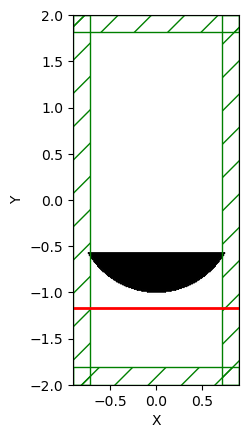

In [27]:
sim = mp.Simulation(
    cell_size=mp.Vector3(1.8, 4), 
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=source,
    resolution=resolution,
)
sim.plot2D()

     block, center = (-0.74,-0.58,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.74,-0.57,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.6,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.59,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.58,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.57,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1

<Axes: xlabel='X', ylabel='Y'>

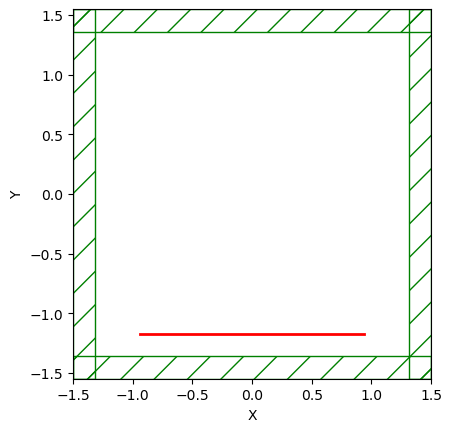

In [20]:
sim = mp.Simulation(
    cell_size=mp.Vector3(3, Ly), 
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=source,
    resolution=resolution,
)
sim.plot2D()

     block, center = (-0.74,-0.58,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.74,-0.57,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.6,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.59,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.58,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.0625,5.0625,5.0625)
     block, center = (-0.73,-0.57,0)
          size (0.005,0.005,0)
          axes (1,0,0), (0,1

<Axes: xlabel='X', ylabel='Y'>

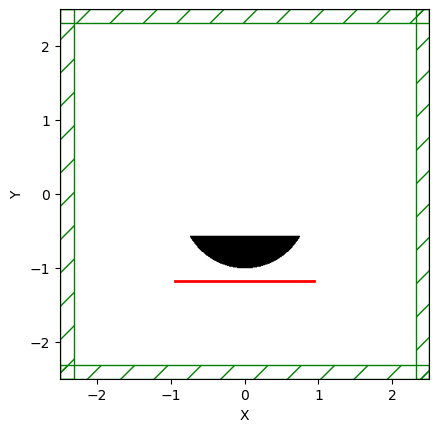

In [11]:
SiO2 = mp.Medium(index=1.5*1.5)

# Update diameter in the simulation parameters
diameter = 1.5

# Constants
PI = np.pi

# Constants
a = 1.0
scale_down = 1

# Parameters of the Plano convex lens
d = (diameter / (a * scale_down)) / 2.0
focal = d * math.sqrt(21.0) / 2.0
r_cur = focal / (2 * a * scale_down)

# Geometry properties
Lpml = 0.25 * d
Lx = diameter / (a * scale_down) + Lpml * 2
Ly = Lpml + 0.25 * d + focal + r_cur - math.sqrt(r_cur * r_cur - d * d) + 0.5 * d + Lpml 
resolution = 100

pml_layers = [mp.PML(thickness=Lpml,)]

# Position information
src_ypos = -Ly / 2 + Lpml + 0.25 * d
transmission_ypos = Lpml + 1.0
lens_ypos = -Ly / 2 + Lpml + 0.5 * d + math.sqrt(r_cur * r_cur - d * d)
x_center = 0
y_center = lens_ypos + math.sqrt(r_cur * r_cur - d * d)

# Source settings
width = 0.1

fcen_red = 1/(0.65)
fwidth_red = fcen_red * width

fcen_green = 1/(0.55)
fwidth_green = fcen_green * width

fcen_blue = 1/(0.45)
fwidth_blue = fcen_blue * width

src_0 = mp.GaussianSource(frequency=fcen_red, fwidth=fwidth_red, is_integrated=True)
src_1 = mp.GaussianSource(frequency=fcen_green, fwidth=fwidth_green, is_integrated=True)
src_2 = mp.GaussianSource(frequency=fcen_blue, fwidth=fwidth_blue, is_integrated=True)

source_center = [0, src_ypos] # Source position
source_size = mp.Vector3(Lx)

source = [mp.Source(src_0, component=mp.Ez, size=source_size, center=source_center,)]

cell = mp.Vector3(5, 5)

geometry = []
for pos_x in np.arange(-10, 10, 0.01):
    for pos_y in np.arange(-10, 10, 0.01):
        if pos_y <= (lens_ypos):
            if ((pos_x - x_center) ** 2 + (pos_y - y_center) ** 2 <= (r_cur ** 2)):
                geometry.append(mp.Block(center=mp.Vector3(pos_x, pos_y), size=mp.Vector3(0.5/resolution, 0.5/resolution), material=SiO2))

sim = mp.Simulation(
    cell_size=cell, 
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=source,
    resolution=resolution,
)
sim.plot2D()